In [1]:
from pyspark.sql import SparkSession

# Creating a SparkSession
spark = SparkSession.builder.appName("ReadCSV").getOrCreate()

# Reading the CSV file
df = spark.read.format("csv").option("header", "true").load("gs://rs-bucket1-dataproc/Data/Training.csv")
spark = SparkSession.builder.config("spark.sql.debug.maxToStringFields", 100).getOrCreate()



# Displaying the first few rows of the DataFrame
df.show()


23/05/14 20:06:53 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+---------+--------------------+-------------------+---------+------+----------+------------+-------+----------------+--------------+--------+-------------------+-------------------+-------+-----------+-------+--------------------+-----------+-----------+------------+--------+-----------------+---------------------+-----+----------+-----------+--------------+--------+-----------+-----------+--------+--------------+----------+------+----------------+--------------------+---------+------------+--------------+---------+----------+------------+-----------------+-------------------+----------------+-------------------+-------------------+-------+----------------------------+------+-----------------+---------------+--------------+----------+----------+----------+-----------------+---------------+---------------------------+-------------------+------------+------------------+---------+---------+------+--------+-------+------------+---------------------+-------------------+------------

In [2]:
df.head(10)


[Row(itching='1', skin_rash='1', nodal_skin_eruptions='1', continuous_sneezing='0', shivering='0', chills='0', joint_pain='0', stomach_pain='0', acidity='0', ulcers_on_tongue='0', muscle_wasting='0', vomiting='0', burning_micturition='0', spotting_ urination='0', fatigue='0', weight_gain='0', anxiety='0', cold_hands_and_feets='0', mood_swings='0', weight_loss='0', restlessness='0', lethargy='0', patches_in_throat='0', irregular_sugar_level='0', cough='0', high_fever='0', sunken_eyes='0', breathlessness='0', sweating='0', dehydration='0', indigestion='0', headache='0', yellowish_skin='0', dark_urine='0', nausea='0', loss_of_appetite='0', pain_behind_the_eyes='0', back_pain='0', constipation='0', abdominal_pain='0', diarrhoea='0', mild_fever='0', yellow_urine='0', yellowing_of_eyes='0', acute_liver_failure='0', fluid_overload45='0', swelling_of_stomach='0', swelled_lymph_nodes='0', malaise='0', blurred_and_distorted_vision='0', phlegm='0', throat_irritation='0', redness_of_eyes='0', sinu

In [3]:
train_df = spark.read.format("csv").option("header", "true").load("gs://rs-bucket1-dataproc/Data/Training.csv")

# Read the testing CSV file
test_df = spark.read.format("csv").option("header", "true").load("gs://rs-bucket1-dataproc/Data/Testing.csv")



In [4]:
# Displaying the first few rows of the training DataFrame
train_df.show(5)

+-------+---------+--------------------+-------------------+---------+------+----------+------------+-------+----------------+--------------+--------+-------------------+-------------------+-------+-----------+-------+--------------------+-----------+-----------+------------+--------+-----------------+---------------------+-----+----------+-----------+--------------+--------+-----------+-----------+--------+--------------+----------+------+----------------+--------------------+---------+------------+--------------+---------+----------+------------+-----------------+-------------------+----------------+-------------------+-------------------+-------+----------------------------+------+-----------------+---------------+--------------+----------+----------+----------+-----------------+---------------+---------------------------+-------------------+------------+------------------+---------+---------+------+--------+-------+------------+---------------------+-------------------+------------

In [5]:
test_df.show(10)

+-------+---------+--------------------+-------------------+---------+------+----------+------------+-------+----------------+--------------+--------+-------------------+-------------------+-------+-----------+-------+--------------------+-----------+-----------+------------+--------+-----------------+---------------------+-----+----------+-----------+--------------+--------+-----------+-----------+--------+--------------+----------+------+----------------+--------------------+---------+------------+--------------+---------+----------+------------+-----------------+-------------------+----------------+-------------------+-------------------+-------+----------------------------+------+-----------------+---------------+--------------+----------+----------+----------+-----------------+---------------+---------------------------+-------------------+------------+------------------+---------+---------+------+--------+-------+------------+---------------------+-------------------+------------

In [6]:
train_df.printSchema()

root
 |-- itching: string (nullable = true)
 |-- skin_rash: string (nullable = true)
 |-- nodal_skin_eruptions: string (nullable = true)
 |-- continuous_sneezing: string (nullable = true)
 |-- shivering: string (nullable = true)
 |-- chills: string (nullable = true)
 |-- joint_pain: string (nullable = true)
 |-- stomach_pain: string (nullable = true)
 |-- acidity: string (nullable = true)
 |-- ulcers_on_tongue: string (nullable = true)
 |-- muscle_wasting: string (nullable = true)
 |-- vomiting: string (nullable = true)
 |-- burning_micturition: string (nullable = true)
 |-- spotting_ urination: string (nullable = true)
 |-- fatigue: string (nullable = true)
 |-- weight_gain: string (nullable = true)
 |-- anxiety: string (nullable = true)
 |-- cold_hands_and_feets: string (nullable = true)
 |-- mood_swings: string (nullable = true)
 |-- weight_loss: string (nullable = true)
 |-- restlessness: string (nullable = true)
 |-- lethargy: string (nullable = true)
 |-- patches_in_throat: strin

In [7]:
cols = train_df.columns[0:40]

# Printing the column names
print(cols)

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain']


In [8]:
from pyspark.sql.functions import col
indigestion_col = col("indigestion")

# Display the values in the "indigestion" column
train_df.select(indigestion_col).show()

+-----------+
|indigestion|
+-----------+
|          0|
|          0|
|          0|
|          0|
|          0|
|          0|
|          0|
|          0|
|          0|
|          0|
|          0|
|          0|
|          0|
|          0|
|          0|
|          0|
|          0|
|          0|
|          0|
|          0|
+-----------+
only showing top 20 rows



In [9]:


# Create a SparkSession
spark = SparkSession.builder.appName("UniqueValues").getOrCreate()


# Get the unique values in the "prognosis" column
unique_prognosis = train_df.select("prognosis").distinct().collect()

# Print the unique values
for row in unique_prognosis:
    print(row[0])


Impetigo
Urinary tract infection
Hyperthyroidism
Gastroenteritis
Heart attack
Chronic cholestasis
Tuberculosis
Hypoglycemia
Cervical spondylosis
Hepatitis D
Osteoarthristis
Varicose veins
Migraine
Hepatitis B
Arthritis
Malaria
Hypothyroidism
Chicken pox
Hypertension 
Peptic ulcer diseae
Acne
Bronchial Asthma
Diabetes 
Paralysis (brain hemorrhage)
hepatitis A
AIDS
Hepatitis E
Drug Reaction
Typhoid
GERD
Alcoholic hepatitis
Hepatitis C
Dimorphic hemmorhoids(piles)
Psoriasis
Jaundice
(vertigo) Paroymsal  Positional Vertigo
Common Cold
Allergy
Pneumonia
Dengue
Fungal infection


Impetigo 120
Urinary tract infection 120
Hyperthyroidism 120
Gastroenteritis 120
Heart attack 120
Chronic cholestasis 120
Tuberculosis 120
Hypoglycemia 120
Cervical spondylosis 120
Hepatitis D 120
Osteoarthristis 120
Varicose veins 120
Migraine 120
Hepatitis B 120
Arthritis 120
Malaria 120
Hypothyroidism 120
Chicken pox 120
Hypertension  120
Peptic ulcer diseae 120
Acne 120
Bronchial Asthma 120
Diabetes  120
Paralysis (brain hemorrhage) 120
hepatitis A 120
AIDS 120
Hepatitis E 120
Drug Reaction 120
Typhoid 120
GERD 120
Alcoholic hepatitis 120
Hepatitis C 120
Dimorphic hemmorhoids(piles) 120
Psoriasis 120
Jaundice 120
(vertigo) Paroymsal  Positional Vertigo 120
Common Cold 120
Allergy 120
Pneumonia 120
Dengue 120
Fungal infection 120


<AxesSubplot:xlabel='count', ylabel='prognosis'>

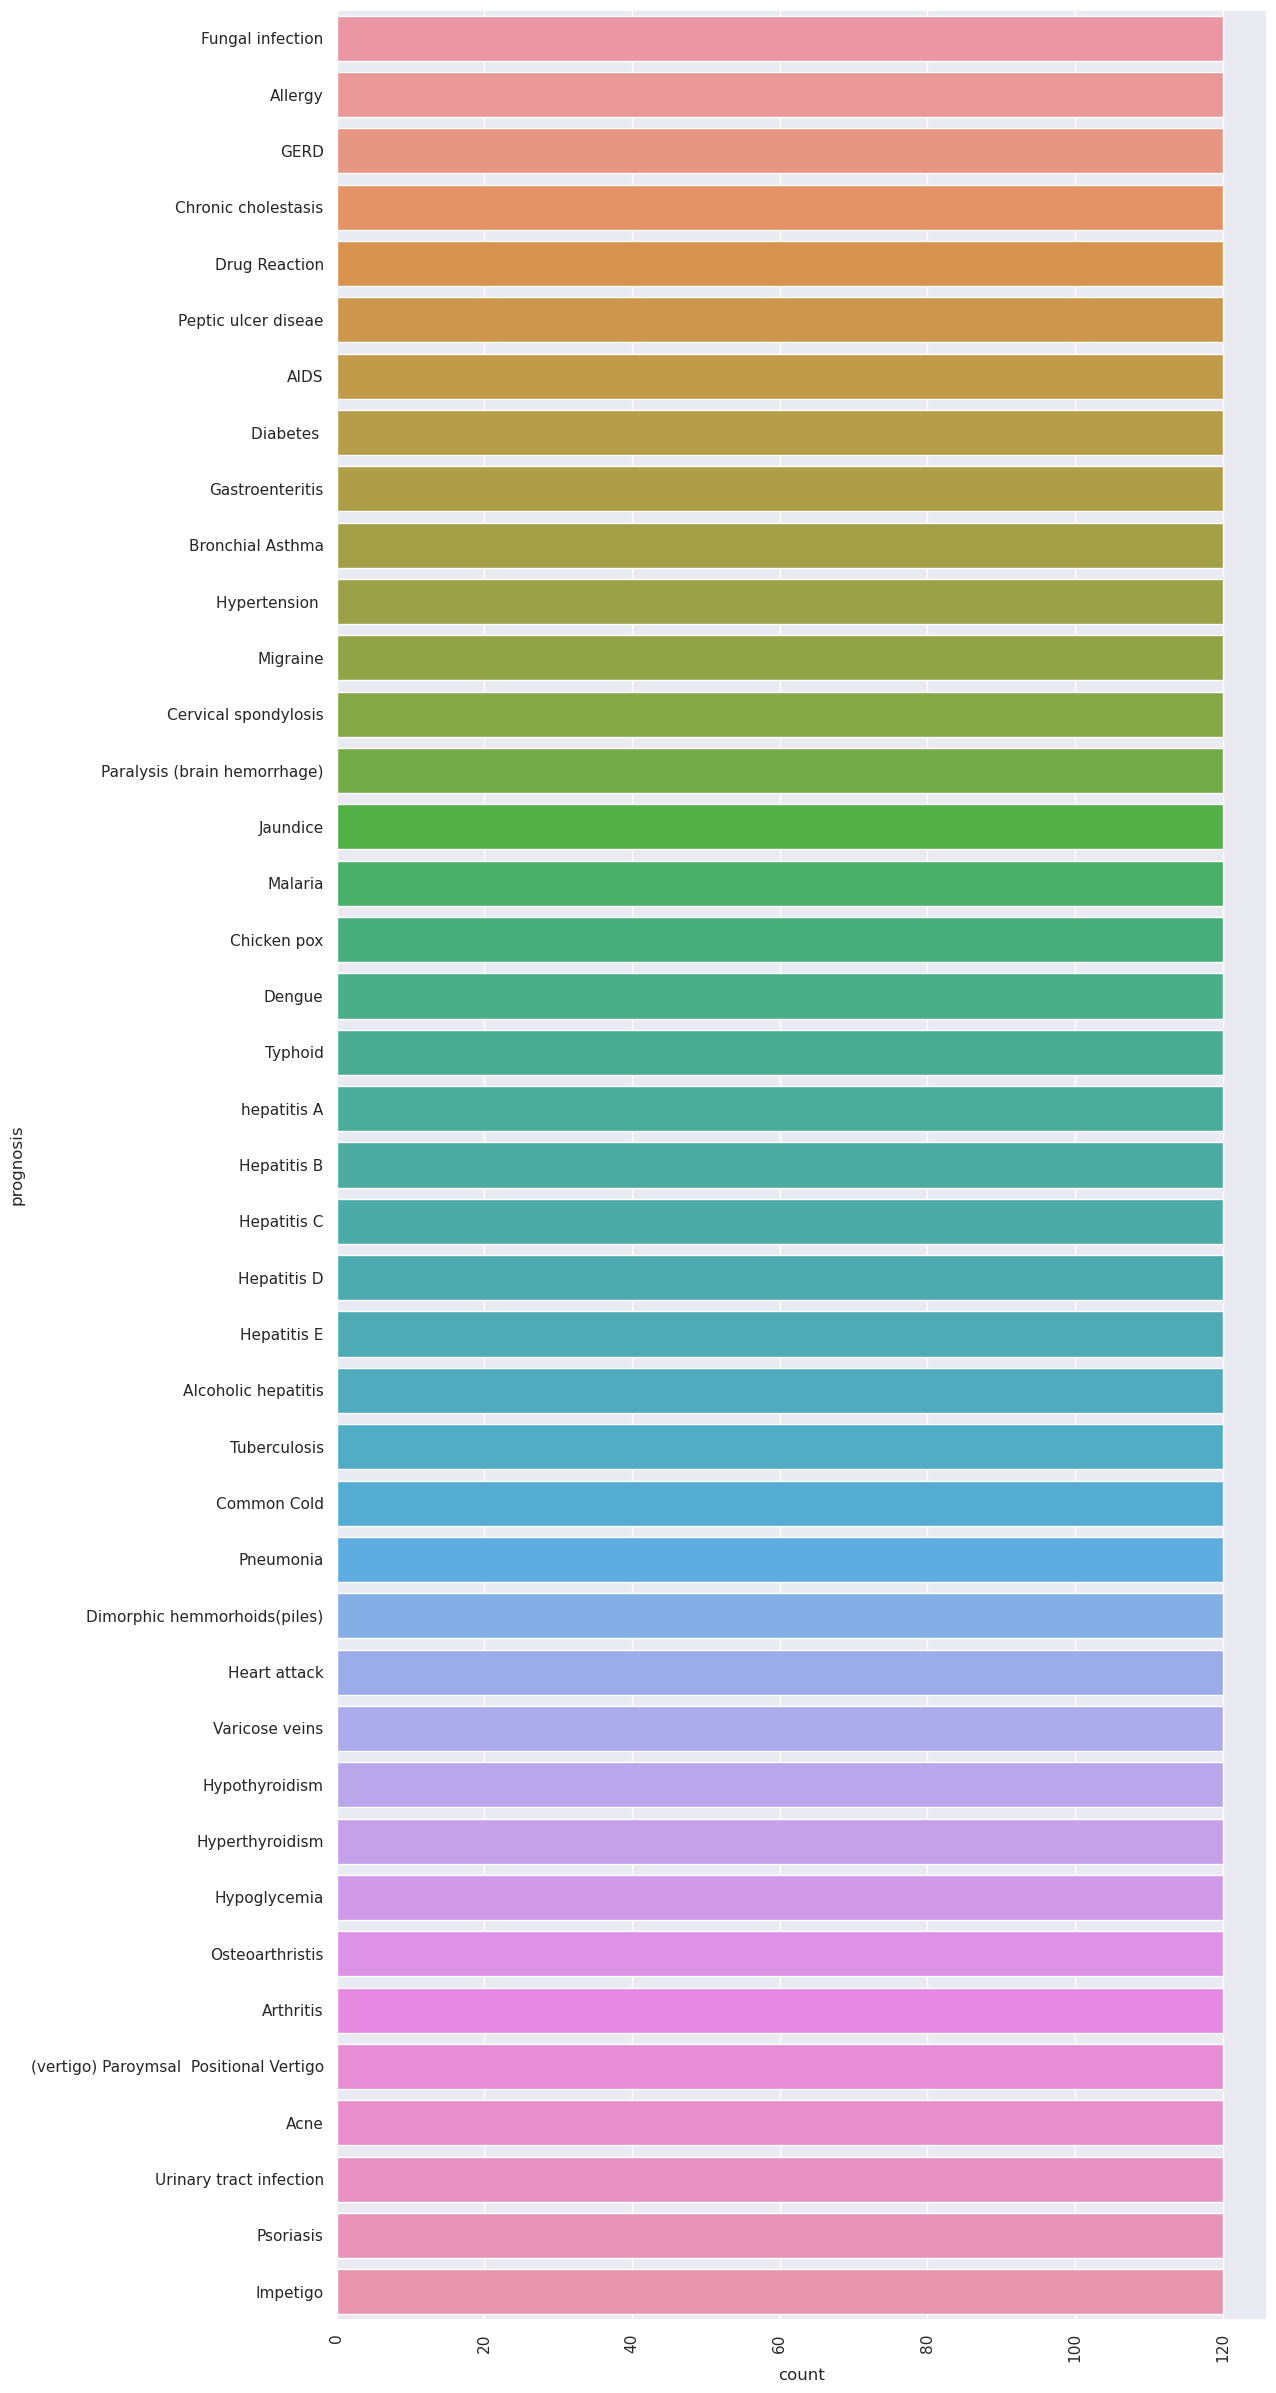

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create a SparkSession
spark = SparkSession.builder.appName("ValueCounts").getOrCreate()


# Get the value counts for the "prognosis" column
prognosis_counts = train_df.groupBy("prognosis").count().orderBy("count", ascending=False).collect()

# Print the value counts
for row in prognosis_counts:
    print(row[0], row[1])

# Visualize the value counts using a countplot
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,30))
plt.xticks(rotation = 90)
sns.countplot(y="prognosis", data=train_df.toPandas())


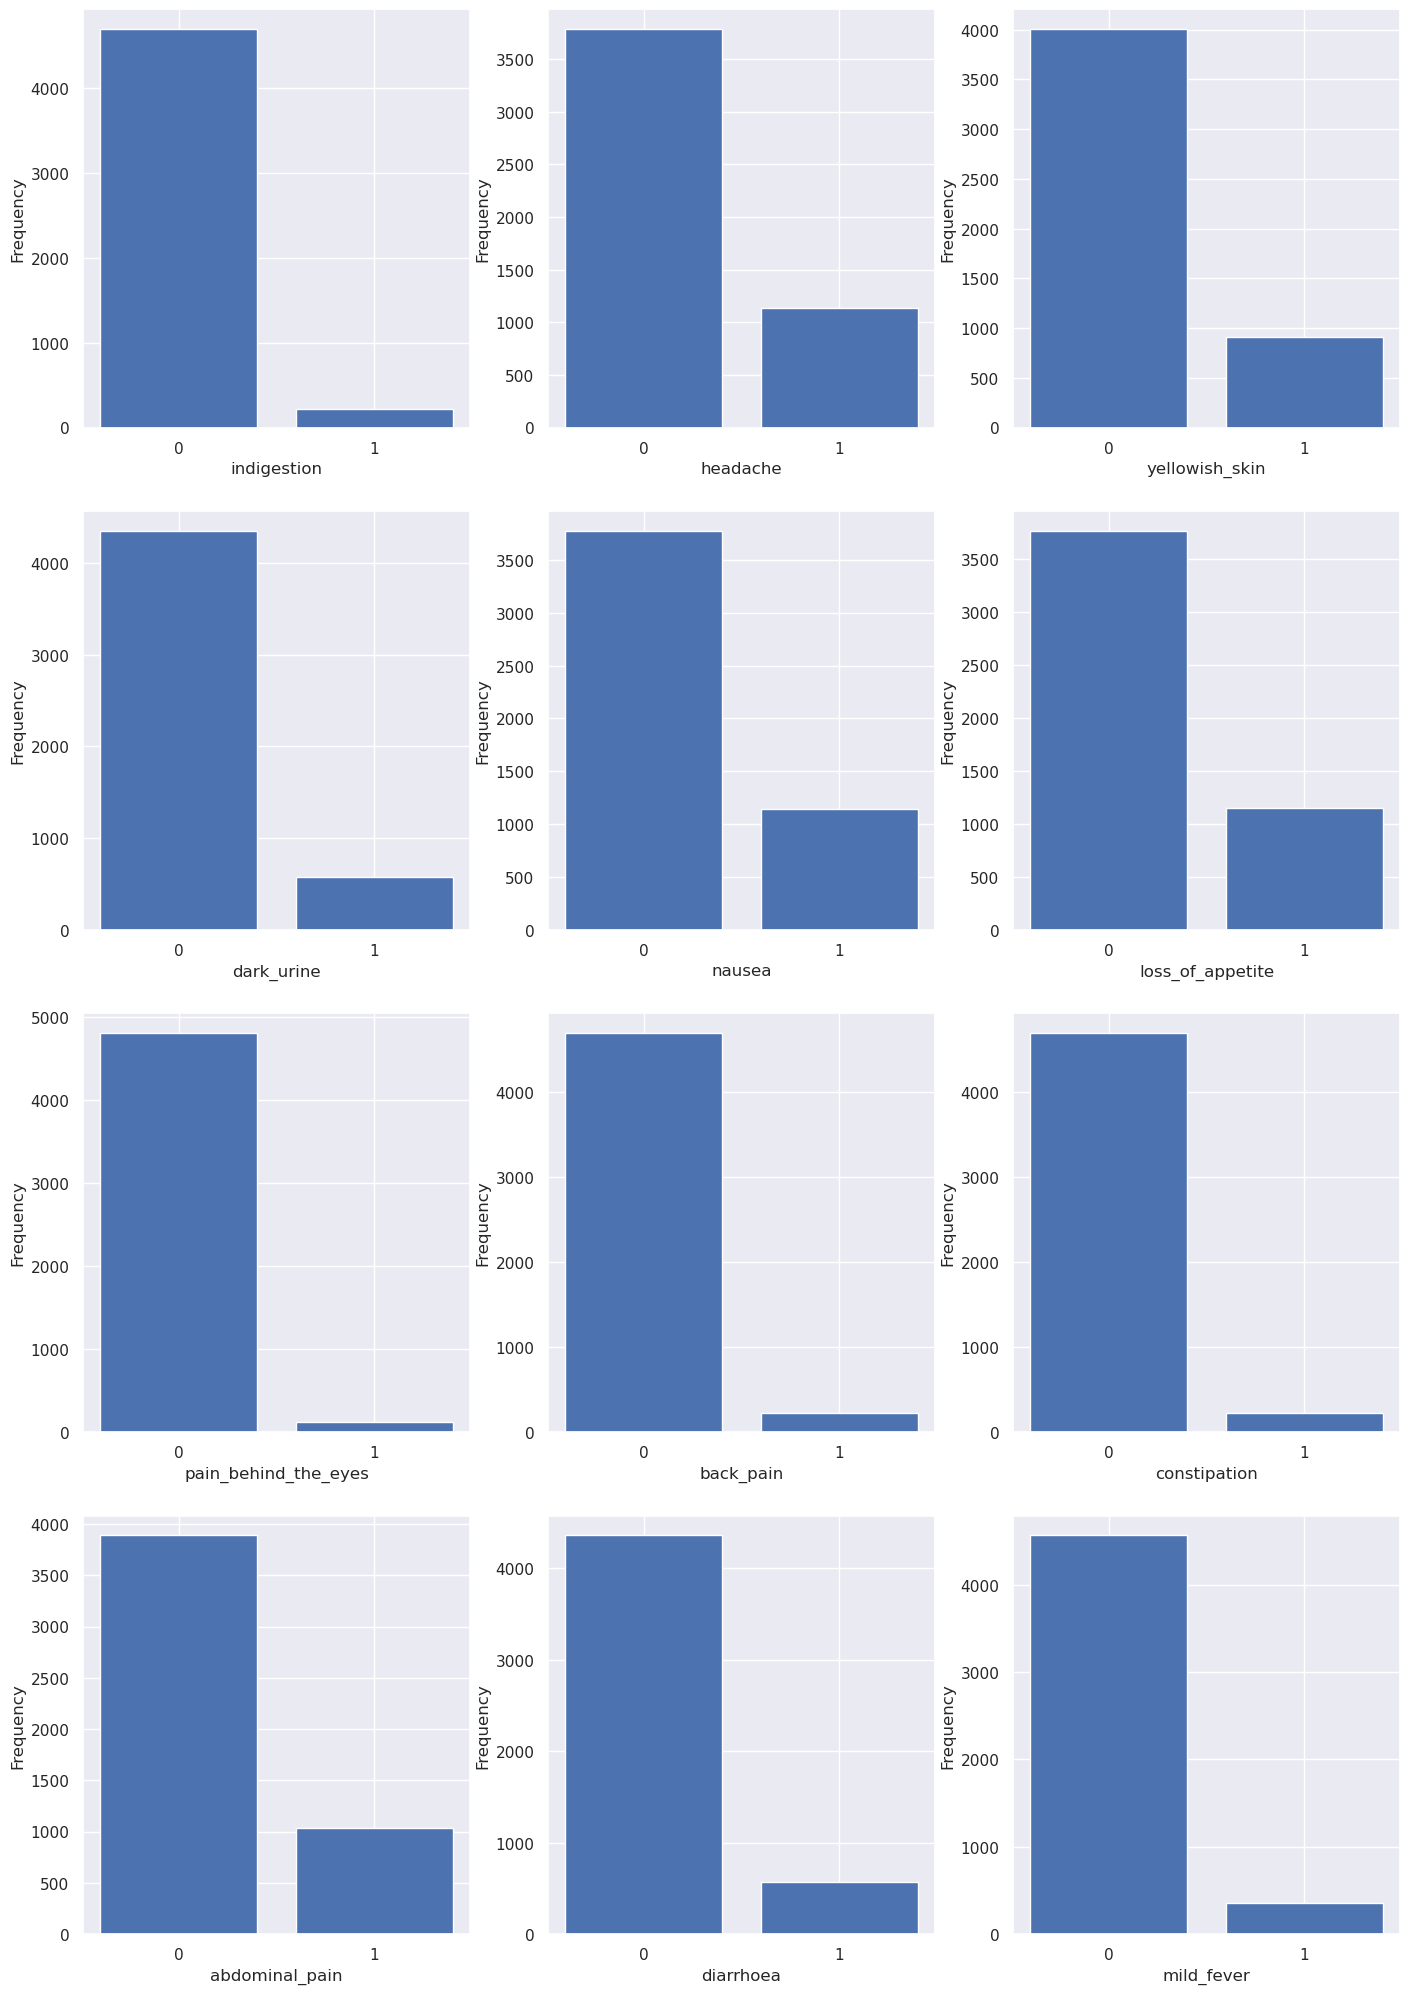

In [11]:
import matplotlib.pyplot as plt

# Create a list of features to visualize
features = ['indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea','loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation','abdominal_pain', 'diarrhoea', 'mild_fever']

# Create a figure with subplots for each feature
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(17, 25))

# Loop through the features and plot a bar chart of their value counts on each subplot
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    values = train_df.groupBy(feature).count().orderBy(feature).toPandas()
    axs[row, col].bar(values[feature], values['count'])
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel("Frequency")
    
# Display the figure
plt.show()


In [12]:
train_df.printSchema()


root
 |-- itching: string (nullable = true)
 |-- skin_rash: string (nullable = true)
 |-- nodal_skin_eruptions: string (nullable = true)
 |-- continuous_sneezing: string (nullable = true)
 |-- shivering: string (nullable = true)
 |-- chills: string (nullable = true)
 |-- joint_pain: string (nullable = true)
 |-- stomach_pain: string (nullable = true)
 |-- acidity: string (nullable = true)
 |-- ulcers_on_tongue: string (nullable = true)
 |-- muscle_wasting: string (nullable = true)
 |-- vomiting: string (nullable = true)
 |-- burning_micturition: string (nullable = true)
 |-- spotting_ urination: string (nullable = true)
 |-- fatigue: string (nullable = true)
 |-- weight_gain: string (nullable = true)
 |-- anxiety: string (nullable = true)
 |-- cold_hands_and_feets: string (nullable = true)
 |-- mood_swings: string (nullable = true)
 |-- weight_loss: string (nullable = true)
 |-- restlessness: string (nullable = true)
 |-- lethargy: string (nullable = true)
 |-- patches_in_throat: strin

In [13]:
train_df.show()


+-------+---------+--------------------+-------------------+---------+------+----------+------------+-------+----------------+--------------+--------+-------------------+-------------------+-------+-----------+-------+--------------------+-----------+-----------+------------+--------+-----------------+---------------------+-----+----------+-----------+--------------+--------+-----------+-----------+--------+--------------+----------+------+----------------+--------------------+---------+------------+--------------+---------+----------+------------+-----------------+-------------------+----------------+-------------------+-------------------+-------+----------------------------+------+-----------------+---------------+--------------+----------+----------+----------+-----------------+---------------+---------------------------+-------------------+------------+------------------+---------+---------+------+--------+-------+------------+---------------------+-------------------+------------

In [14]:
from pyspark.sql.functions import col
df = df.select([col(c).cast("double").alias(c) for c in df.columns])


In [29]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler


# initializing a SparkSession
spark = SparkSession.builder.appName("medical_diagnosis").getOrCreate()


In [30]:
# split the dataset into training and test set
train_df = spark.read.format("csv").option("header", "true").load("gs://rs-bucket1-dataproc/Data/Training.csv")

# Read the testing CSV file
test_df = spark.read.format("csv").option("header", "true").load("gs://rs-bucket1-dataproc/Data/Testing.csv")


In [31]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
train_df = pd.read_csv("gs://rs-bucket1-dataproc/Data/Training.csv")
test_df = pd.read_csv("gs://rs-bucket1-dataproc/Data/Testing.csv")
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [20]:
train_df["prognosis"].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

Hepatitis C                                120
Allergy                                    120
Migraine                                   120
Gastroenteritis                            120
Hyperthyroidism                            120
Hepatitis B                                120
Chronic cholestasis                        120
Common Cold                                120
Hepatitis E                                120
Jaundice                                   120
GERD                                       120
Osteoarthristis                            120
Hypoglycemia                               120
Malaria                                    120
Impetigo                                   120
Alcoholic hepatitis                        120
Chicken pox                                120
Heart attack                               120
Hypothyroidism                             120
Dimorphic hemmorhoids(piles)               120
(vertigo) Paroymsal  Positional Vertigo    120
Arthritis    

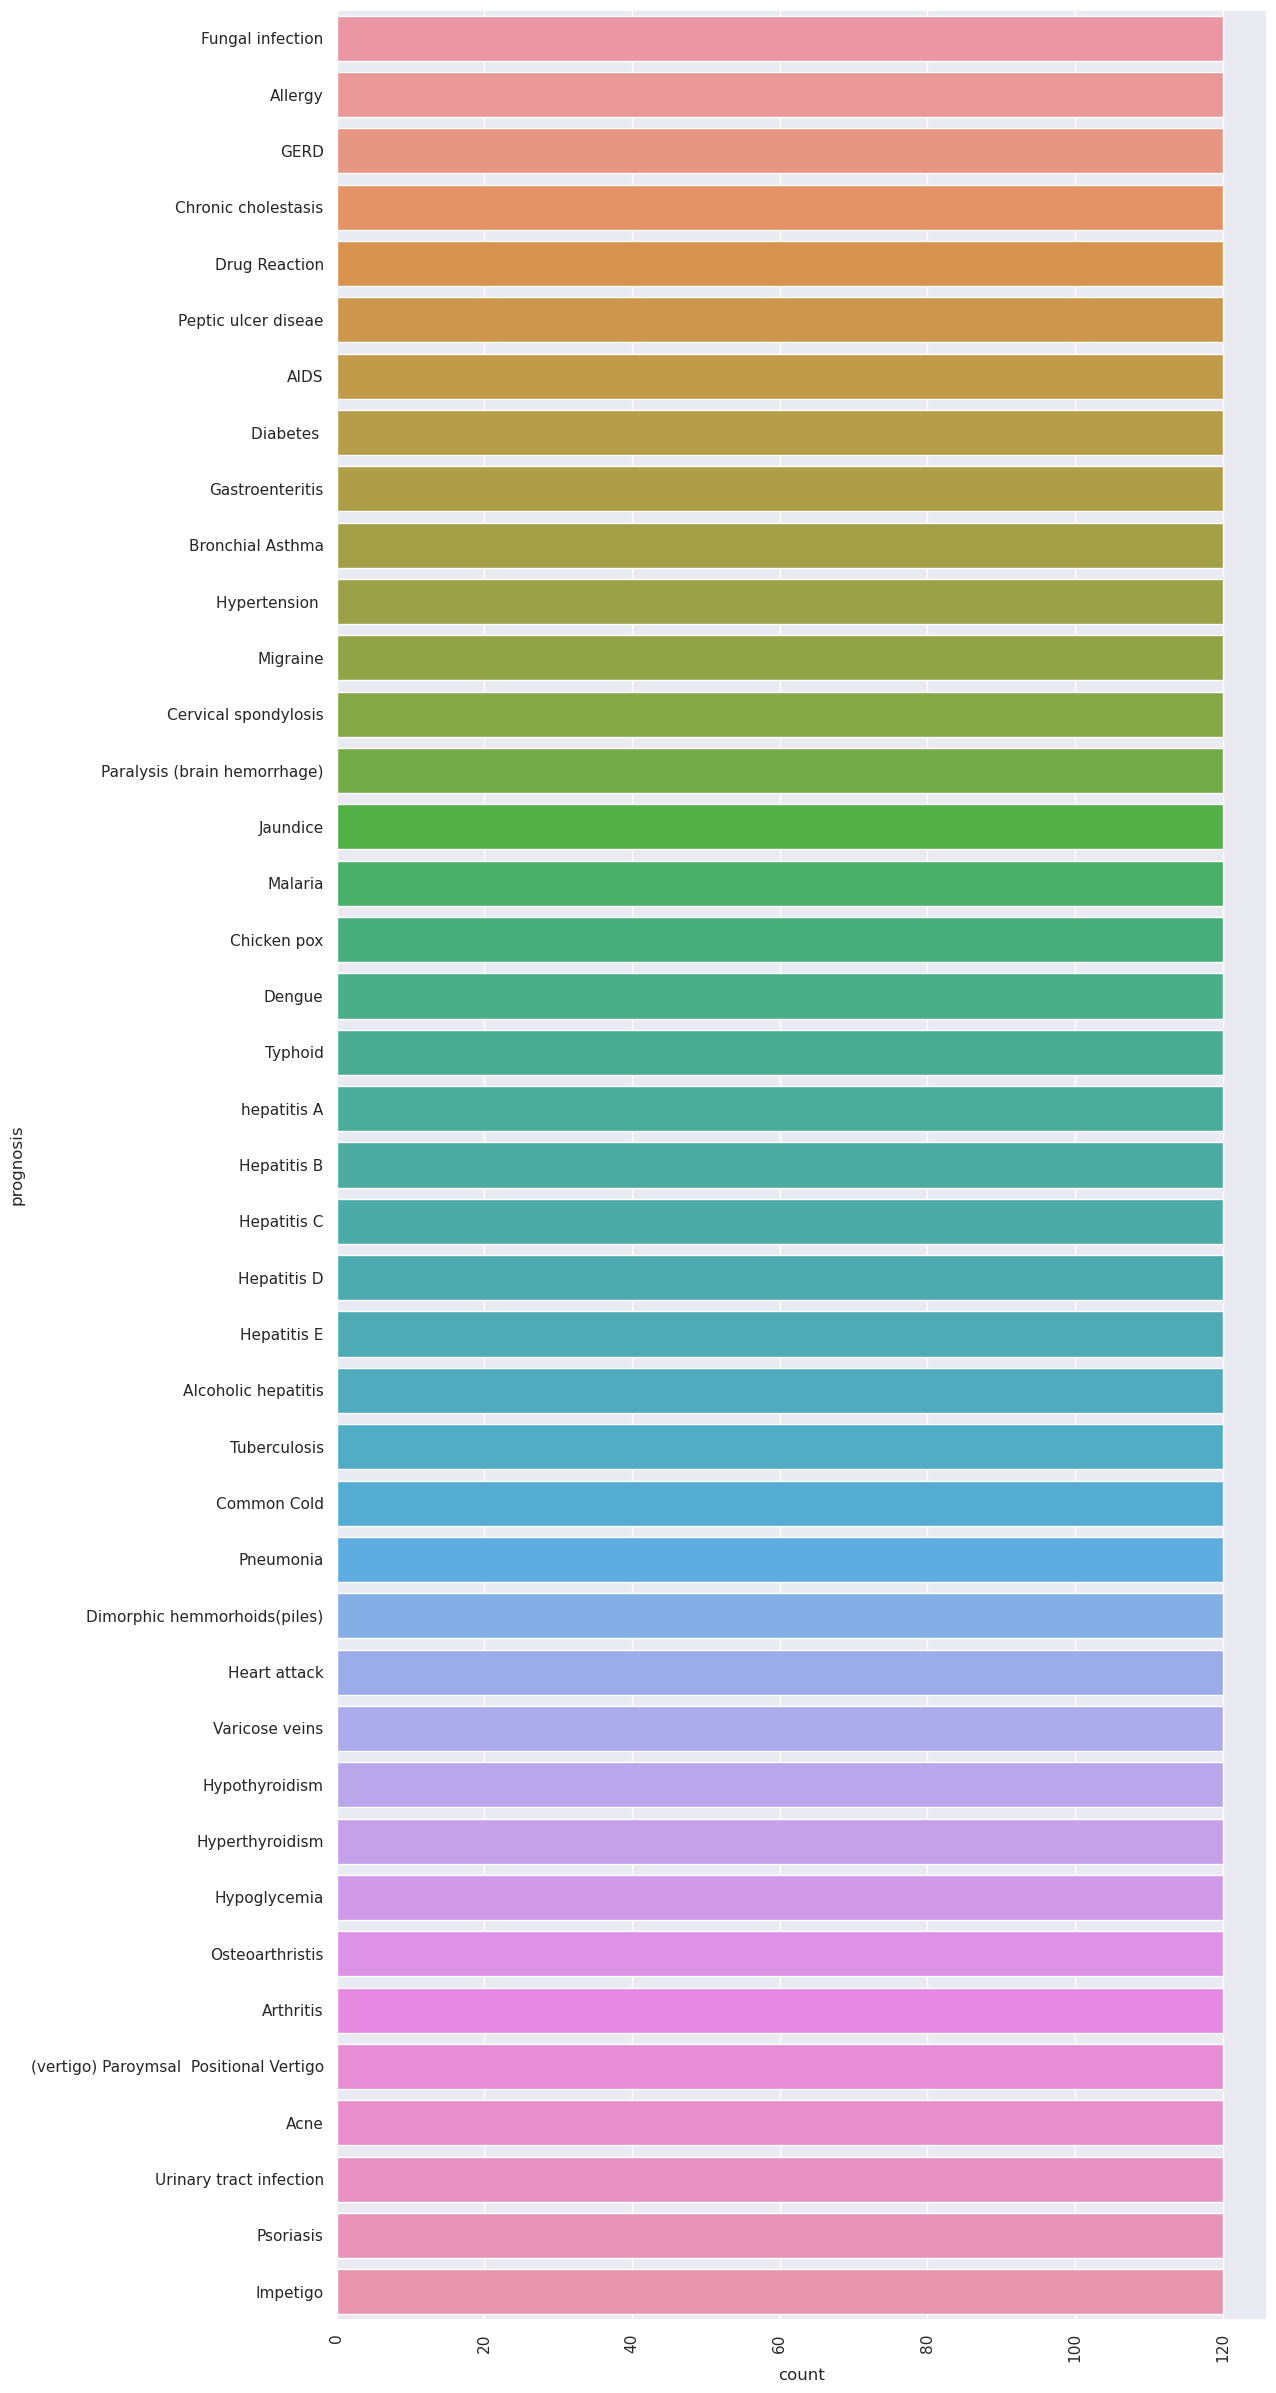

In [34]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,30))
plt.xticks(rotation = 90)
sns.countplot(y="prognosis", data=train_df)
print(train_df["prognosis"].value_counts())

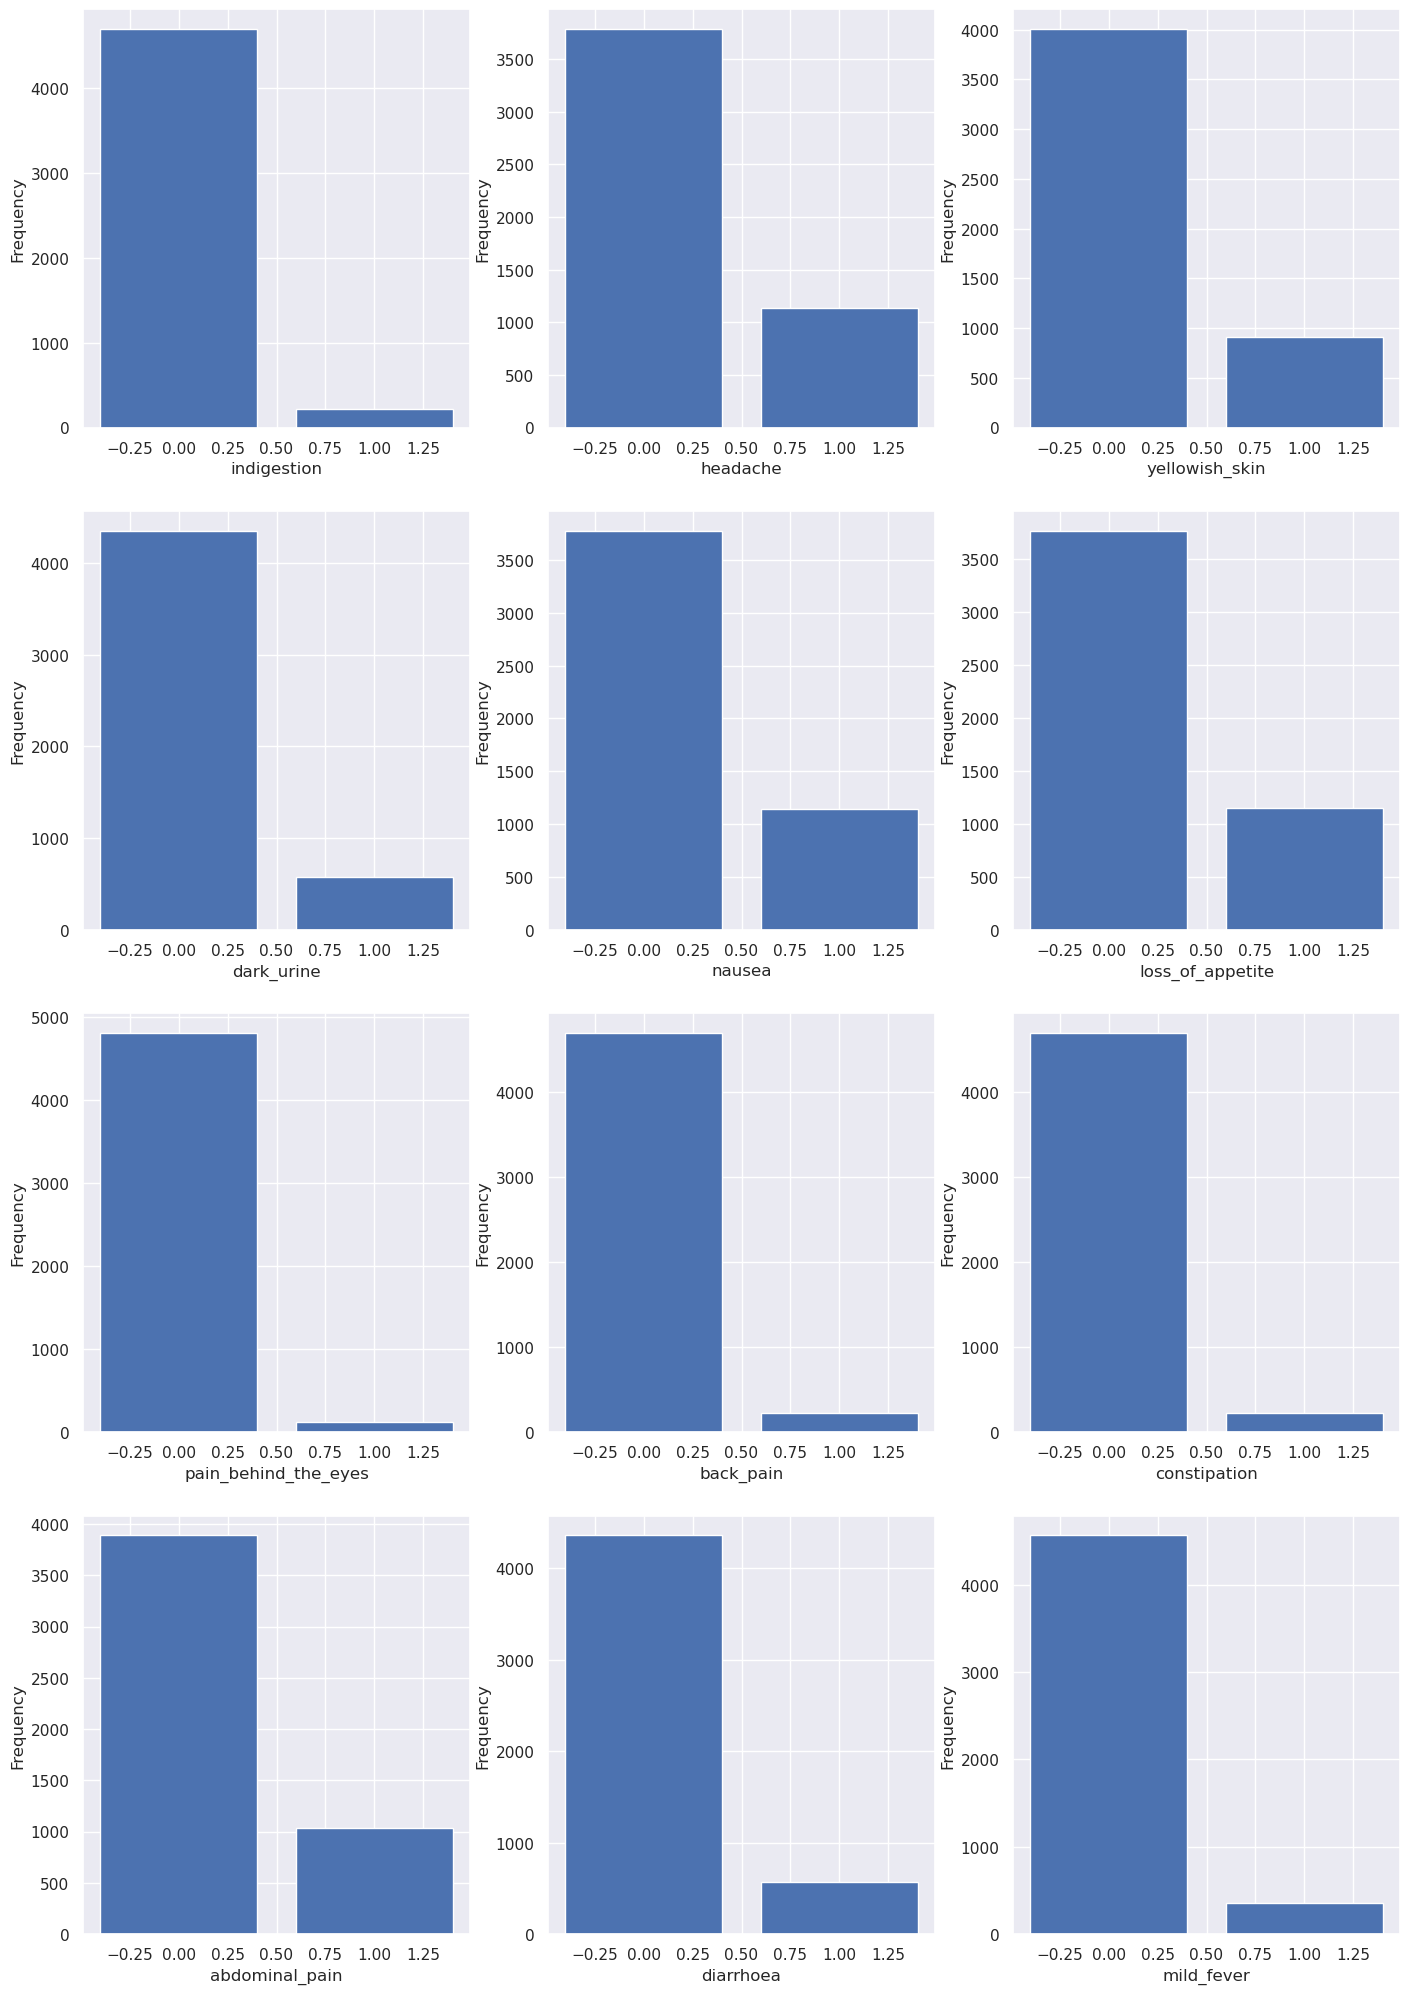

In [35]:
# lets visualize some of features
features = ['indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation',
       'abdominal_pain', 'diarrhoea', 'mild_fever']

plt.figure(figsize = (17,25))
for i, feature in enumerate(features):
    plt.subplot(4,3,i+1)
    plt.bar(train_df[feature].value_counts().index.to_numpy(), train_df[feature].value_counts().values)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.show()

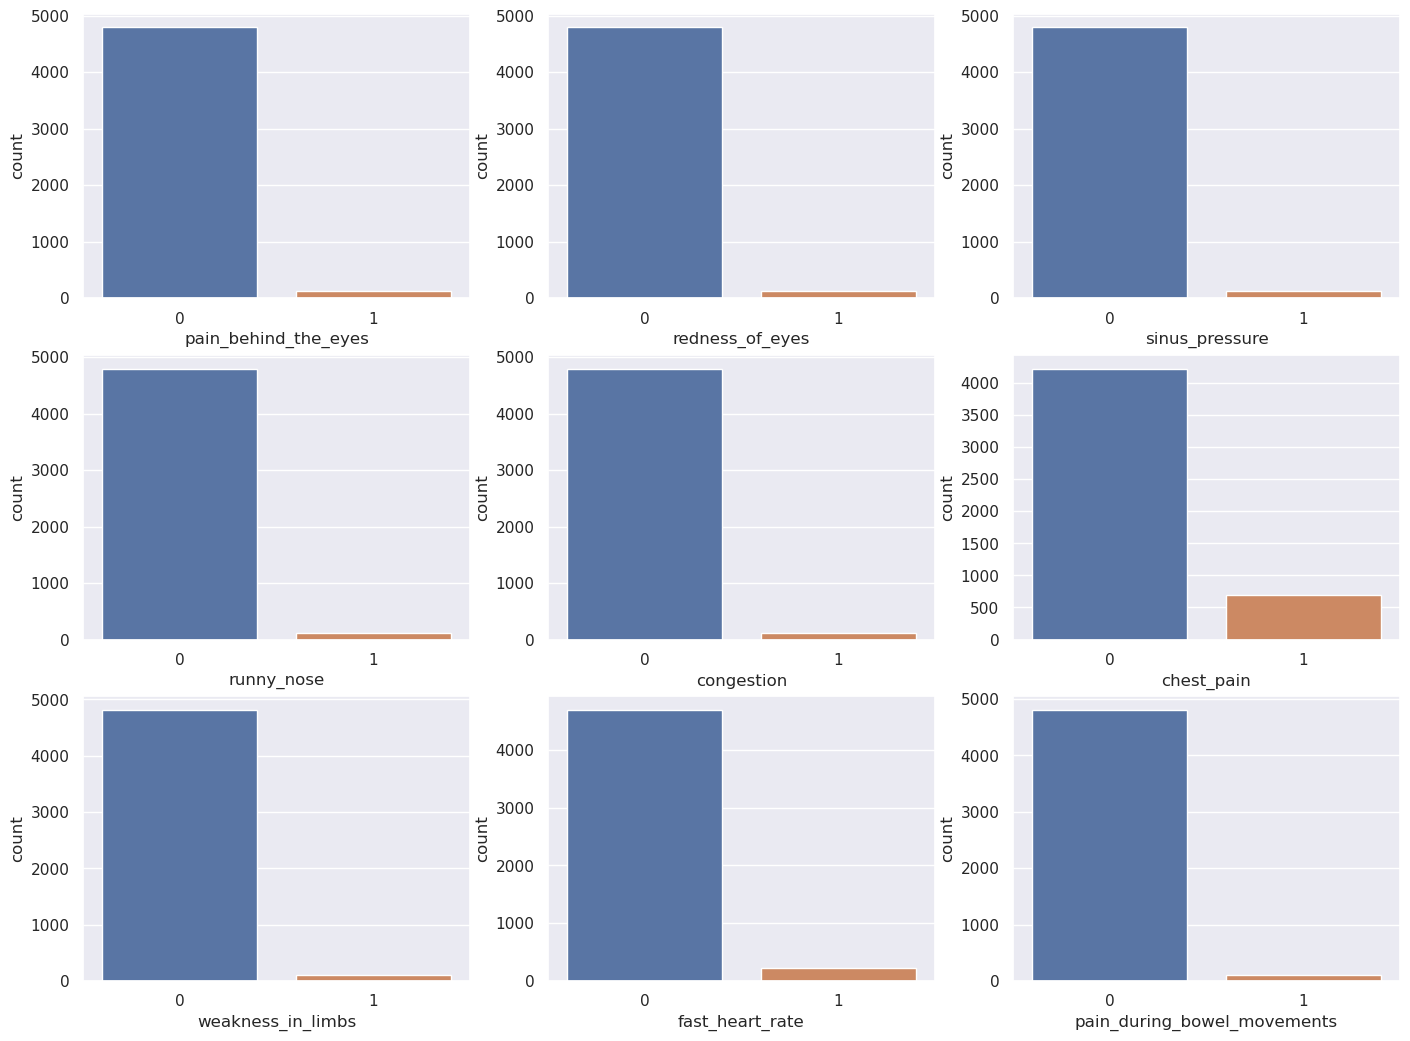

In [72]:
# visualize it with seaborn library one more time
features = ['pain_behind_the_eyes', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion',
       'chest_pain', 'weakness_in_limbs', 'fast_heart_rate',
       'pain_during_bowel_movements']

plt.figure(figsize = (17,17))
for i, feature in enumerate(features):
    plt.subplot(4,3,i+1)
    sns.countplot(x = feature, data = train_df)
    plt.xlabel(feature)
plt.show()

In [36]:
# drop unnamed feature from train data
train_df.drop("Unnamed: 133", axis = 1, inplace = True)
# train_df["Unnamed: 133"]  # it's not here anymore

In [37]:
train_df.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [38]:
# Modelling
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  # k = 5
x_train, y_train = train_df.loc[:,train_df.columns != "prognosis"], train_df.loc[:,"prognosis"]
x_test, y_test = test_df.loc[:,train_df.columns != "prognosis"], test_df.loc[:,"prognosis"]
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("Prediction list: {}".format(prediction[0:50]))
print("With KNN (K=5) accuracy is: ",knn.score(x_test, y_test))

Prediction list: ['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo'
 'Fungal infection']
With KNN (K=5) accuracy is:  1.0


In [26]:
neighbors = np.arange(1,25)  
train_accuracy = []
test_accuracy = []
# Looping for different k values
for i, k in enumerate(neighbors):
    # k from 1 to 25 (excluded)
    knn = KNeighborsClassifier(n_neighbors = k)
    # fiting the knn
    knn.fit(x_train, y_train)
    # training accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # testng accuracy
    test_accuracy.append(knn.score(x_test, y_test))

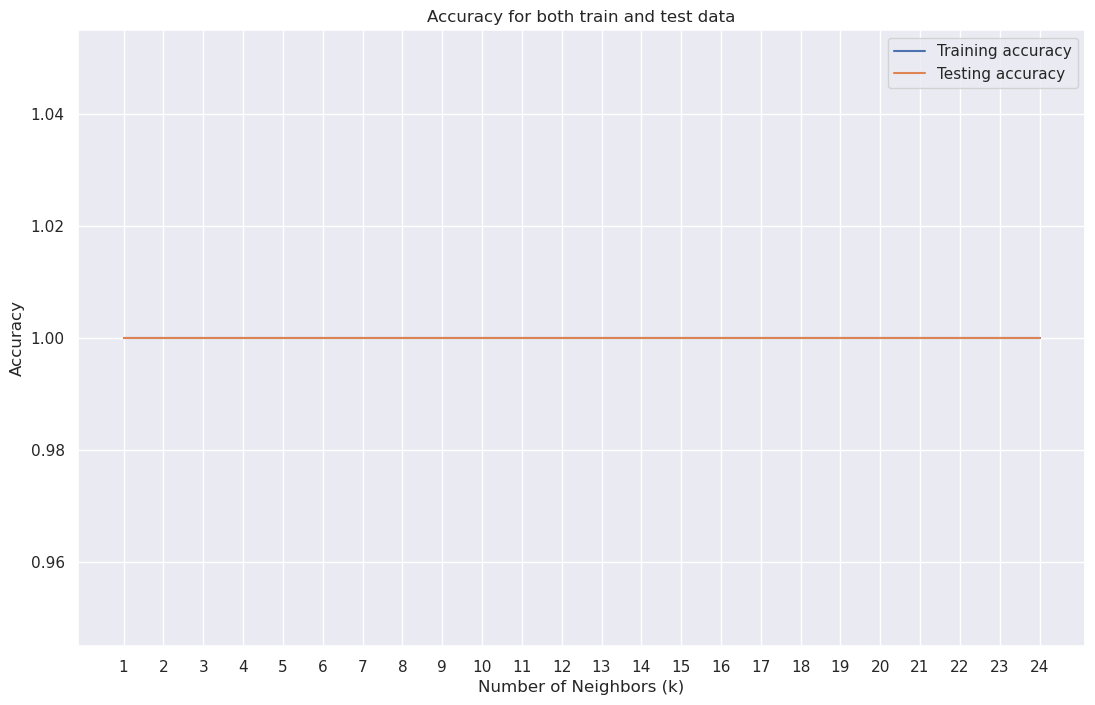

In [79]:
# Ploting the accuracies
plt.figure(figsize = (13,8))
plt.plot(neighbors, train_accuracy, label = "Training accuracy")
plt.plot(neighbors, test_accuracy, label = "Testing accuracy")
plt.legend()
plt.title("Accuracy for both train and test data")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(neighbors)
plt.show()

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train, y_train)
dt.predict(x_test)
dt.score(x_test, y_test)

0.9761904761904762